In [3]:
# !pip3 install --upgrade pip
# !pip install 'anomalib[full]==1.2.0'
# !pip install ollama==0.3
!pip install matplotlib==3.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [1]:
import os
from anomalib.data import MVTec
from anomalib.models import Patchcore, EfficientAd
from anomalib.engine import Engine
import pandas as pd

# Suppress outputs
import warnings
warnings.filterwarnings("ignore")

# Configuration
categories = ["tile", "leather", "grid"]
models = {"PatchCore": Patchcore, "EfficientAD": EfficientAd}
results = {}

for model_name, model_class in models.items():
    print("start training", model_name)
    model_results = {}
    for category in categories:
        datamodule = MVTec(category=category, train_batch_size=1, 
            test_split_mode = "synthetic", val_split_mode = "synthetic",
            test_split_ratio = 0.2, val_split_ratio = 0.5)
        if model_name == "PatchCore":
            model = model_class(pre_trained=True)
        else:
            model = model_class()
        engine = Engine(
            max_epochs=1
        )
        engine.fit(model, datamodule=datamodule)
        
        test_results = engine.test(model, datamodule=datamodule)[0]
        model_results[category] = test_results["image_AUROC"] \\cdot 100
    
    results[model_name] = model_results

# Print final results
print("\nFinal Results:")
for model_name, data in results.items():
    avg = sum(data.values()) / len(data)
    df = pd.DataFrame.from_dict(data, orient="index", columns=["AUROC (%)"]).round(1)
    df.loc["Average"] = avg
    print(f"\n{model_name}:\n{df.to_string()}")



/Users/chenyuzhong/miniconda3/envs/ai1/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
INFO:anomalib.models.components.base.anomaly_module:Initializing Patchcore model.


start training PatchCore


INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.
[ WARN:0@5.058] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.

  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | PatchcoreModel           | 24.9 M | train
1 | _transform            | Compose                  | 0      | train
2 | normal

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.patchcore.lightning_model:Aggregating the embedding extracted from the training set.
INFO:anomalib.models.image.patchcore.lightning_model:Applying core-set subsampling to get the embedding.

















































































































































































































































































































































































































































































































































































































































































































































































































Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 39.0982129573822 seconds
Throughput (batch_size=32) : 0.844028345642565 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.5110293626785278     │
│       image_F1Score       │           0.625           │
│        pixel_AUROC        │    0.5417945981025696     │
│       pixel_F1Score       │    0.05743025243282318    │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.

  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | PatchcoreModel           | 24.9 M | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection  

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.patchcore.lightning_model:Aggregating the embedding extracted from the training set.
INFO:anomalib.models.image.patchcore.lightning_model:Applying core-set subsampling to get the embedding.

















































































































































































































































































































































































































































































































































































































































































































































































































Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 50.39005994796753 seconds
Throughput (batch_size=32) : 0.6350458807360619 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │         0.859375          │
│       image_F1Score       │    0.6829268336296082     │
│        pixel_AUROC        │    0.7641461491584778     │
│       pixel_F1Score       │    0.20533199608325958    │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.

  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | PatchcoreModel           | 24.9 M | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection  

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.patchcore.lightning_model:Aggregating the embedding extracted from the training set.
INFO:anomalib.models.image.patchcore.lightning_model:Applying core-set subsampling to get the embedding.

















































































































































































































































































































































































































































































































































































































































































































































































































Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 22.680194854736328 seconds
Throughput (batch_size=32) : 0.9259179709214248 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.3999999761581421     │
│       image_F1Score       │    0.6451612710952759     │
│        pixel_AUROC        │     0.628859281539917     │
│       pixel_F1Score       │    0.07579177618026733    │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


start training EfficientAD



  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | EfficientAdModel         | 8.1 M  | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection         | 0      | train
3 | image_threshold       | F1AdaptiveThreshold      | 0      | train
4 | pixel_threshold       | F1AdaptiveThreshold      | 0      | train
5 | image_metrics         | AnomalibMetricCollection | 0      | train
6 | pixel_metrics         | AnomalibMetricCollection | 0      | train
---------------------------------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.235    Total estimated model params size (MB)
46        Modules in train mode
7         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.data.utils.download:Downloading the efficientad_pretrained_weights.zip dataset.
efficientad_pretrained_weights.zip: 40.0MB [00:01, 25.3MB/s]                            
INFO:anomalib.data.utils.download:Checking the hash of the downloaded file.
INFO:anomalib.data.utils.download:Extracting dataset into pre_trained folder.
INFO:anomalib.data.utils.download:Cleaning up files.
INFO:anomalib.models.image.efficient_ad.lightning_model:Load pretrained teacher model from pre_trained/efficientad_pretrained_weights/pretrained_teacher_small.pth
Calculate teacher channel mean & std: 100%|██████████| 115/115 [01:19<00:00,  1.45it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [01:19<00:00, 19.77s/it]
`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:anomalib.callbacks.timer:Training took 593.97 seconds
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 29.74394679069519 seconds
Throughput (batch_size=32) : 1.1094694403610015 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.49264705181121826    │
│       image_F1Score       │    0.6666666865348816     │
│        pixel_AUROC        │    0.5395971536636353     │
│       pixel_F1Score       │    0.0493135079741478     │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.

  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | EfficientAdModel         | 8.1 M  | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection         | 0      | train
3 | image_threshold       | F1AdaptiveThreshold      | 0      | train
4 | pixel_threshold       | F1AdaptiveThreshold      | 0      | train
5 | image_metrics         | AnomalibMetricCollection | 0      | train
6 | pixel_metrics         | AnomalibMetricCollection | 0      | train
---------------------------------------------------------------------------
8.1 M     Trainable params
0         Non-t

Training: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Load pretrained teacher model from pre_trained/efficientad_pretrained_weights/pretrained_teacher_small.pth
Calculate teacher channel mean & std: 100%|██████████| 123/123 [01:23<00:00,  1.47it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [01:14<00:00, 18.62s/it]
`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:anomalib.callbacks.timer:Training took 576.30 seconds
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 29.33393406867981 seconds
Throughput (batch_size=32) : 1.0908867499694417 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │         0.7265625         │
│       image_F1Score       │    0.6451612710952759     │
│        pixel_AUROC        │    0.5836766958236694     │
│       pixel_F1Score       │    0.06501910835504532    │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.

  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | EfficientAdModel         | 8.1 M  | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection         | 0      | train
3 | image_threshold       | F1AdaptiveThreshold      | 0      | train
4 | pixel_threshold       | F1AdaptiveThreshold      | 0      | train
5 | image_metrics         | AnomalibMetricCollection | 0      | train
6 | pixel_metrics         | AnomalibMetricCollection | 0      | train
---------------------------------------------------------------------------
8.1 M     Trainable params
0         Non-t

Training: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Load pretrained teacher model from pre_trained/efficientad_pretrained_weights/pretrained_teacher_small.pth
Calculate teacher channel mean & std: 100%|██████████| 132/132 [01:35<00:00,  1.38it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [01:27<00:00, 17.51s/it]
`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:anomalib.callbacks.timer:Training took 660.63 seconds
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 23.789838075637817 seconds
Throughput (batch_size=32) : 0.8827298417598406 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.4636363983154297     │
│       image_F1Score       │    0.6206896305084229     │
│        pixel_AUROC        │    0.5265712141990662     │
│       pixel_F1Score       │    0.03533504903316498    │
└───────────────────────────┴───────────────────────────┘


Final Results:

PatchCore:
         AUROC (%)
tile     51.100000
leather  85.900000
grid     40.000000
Average  59.013478

EfficientAD:
         AUROC (%)
tile     49.300000
leather  72.700000
grid     46.400000
Average  56.094865


In [2]:
%%capture
!pip install matplotlib numpy Pillow

In [3]:
%matplotlib inline
import os
import numpy as np
import random
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Configuration
dataset_dir = "./datasets/MVTec"
categories = ["leather", "grid", "tile"]
plt.style.use('ggplot')


In [4]:
def get_features(path, img_size=(64, 64)):
    """Extract flattened image features"""
    feats, imgs = [], []
    for fname in sorted(os.listdir(path)):
        if fname.lower().endswith(".png"):
            try:
                with Image.open(os.path.join(path, fname)) as img:
                    img = img.convert("L").resize(img_size)
                    feats.append(np.array(img).flatten())
                    imgs.append(os.path.join(path, fname))
            except Exception as e:
                print(f"Skipping {fname}: {str(e)}")
    return np.array(feats), imgs

def find_similar_images(query_imgs, train_feats, train_paths, top_n=5):
    """Find similar images using cosine similarity"""
    results = {}
    for query_path in query_imgs:
        try:
            with Image.open(query_path) as img:
                img = img.convert("L").resize((64, 64))
                query_feat = np.array(img).flatten().reshape(1, -1)
                sim_scores = cosine_similarity(query_feat, train_feats).flatten()
                top_indices = sim_scores.argsort()[-top_n:][::-1]
                results[query_path] = [train_paths[i] for i in top_indices]
        except Exception as e:
            print(f"Error processing {query_path}: {str(e)}")
    return results

def visualize_results(results, category):
    """Display results with matplotlib"""
    if not results:
        print(f"No results to display for {category}")
        return
    
    for query_path, matches in results.items():
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"{category.upper()} - Similarity Results", y=1.1)
        
        # Plot query image
        plt.subplot(1, 6, 1)
        plt.imshow(Image.open(query_path), cmap='gray')
        plt.title("Query Image")
        plt.axis('off')
        
        # Plot matches
        for idx, match_path in enumerate(matches[:5], 2):
            plt.subplot(1, 6, idx)
            plt.imshow(Image.open(match_path), cmap='gray')
            plt.title(f"Match {idx-1}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()


Processing LEATHER category
Extracting training features...
✅ Collected 245 training samples

Testing with 3 query images:

Visualizing results...


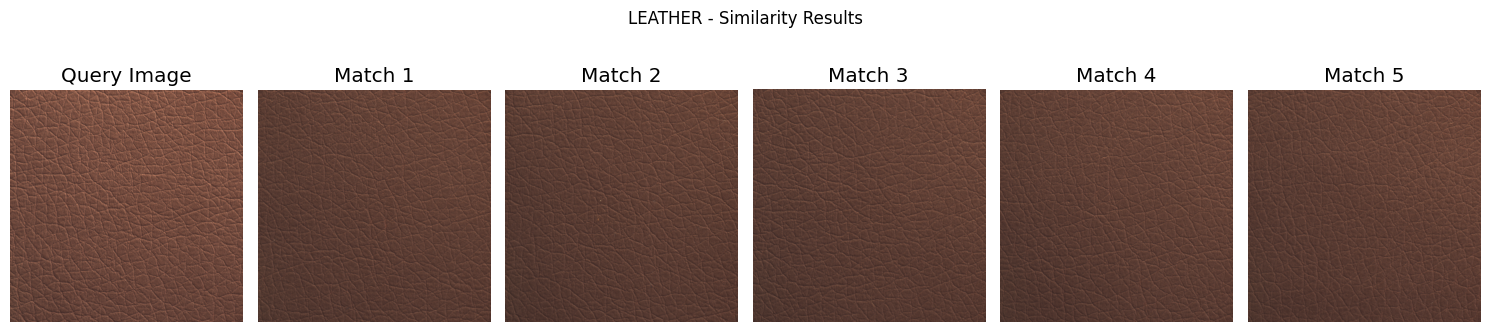

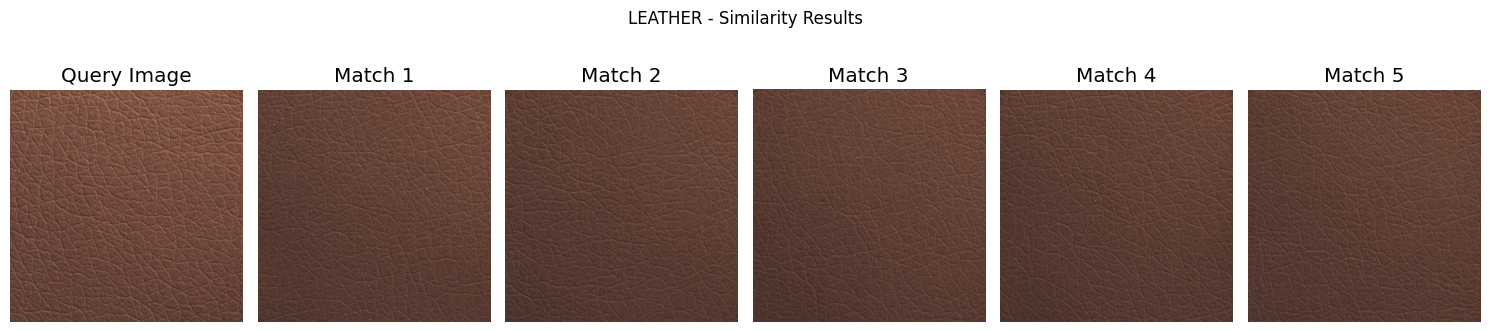

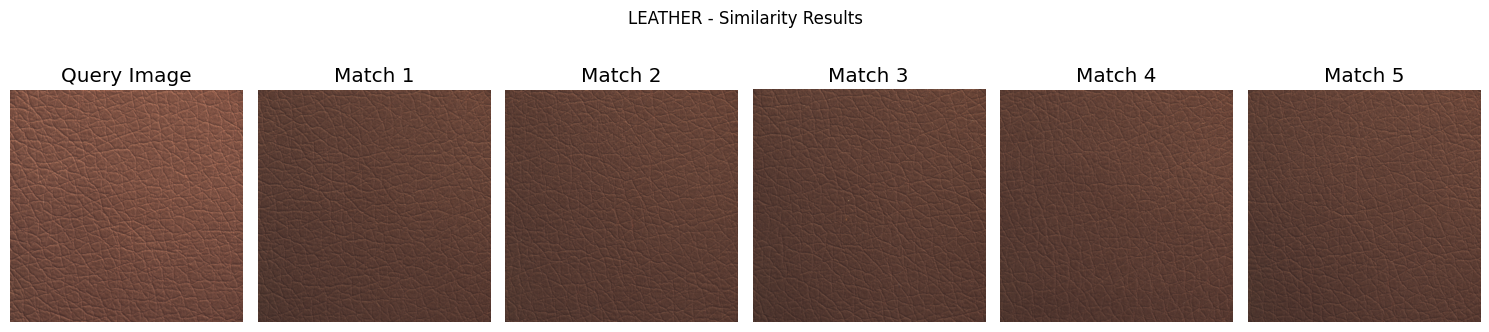


Processing GRID category
Extracting training features...
✅ Collected 264 training samples

Testing with 3 query images:

Visualizing results...


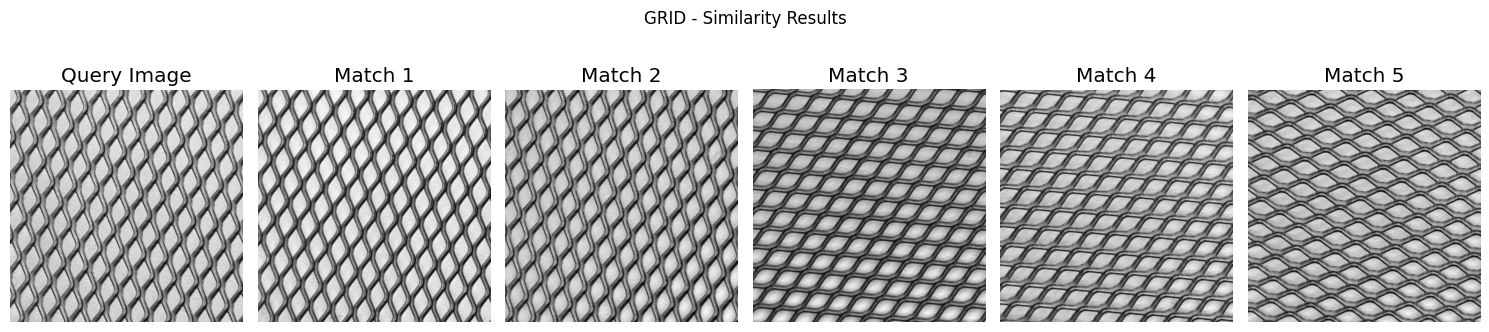

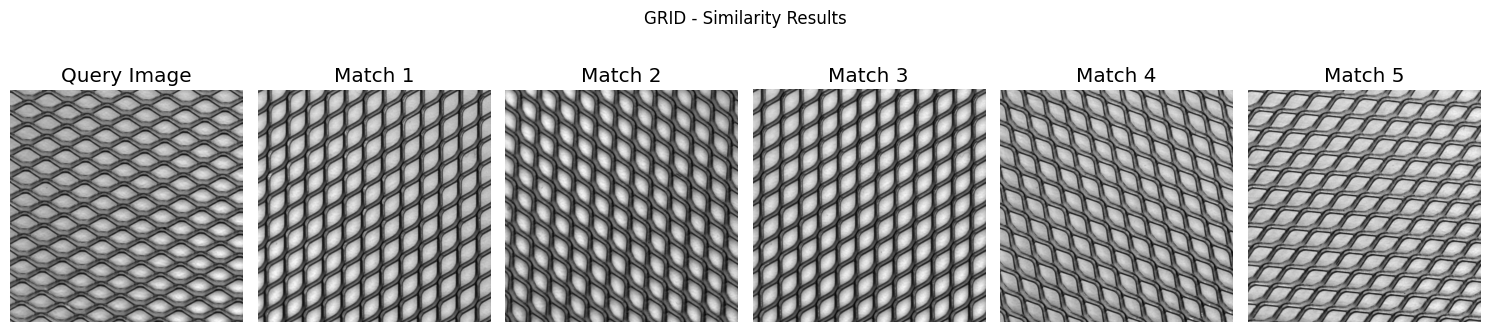

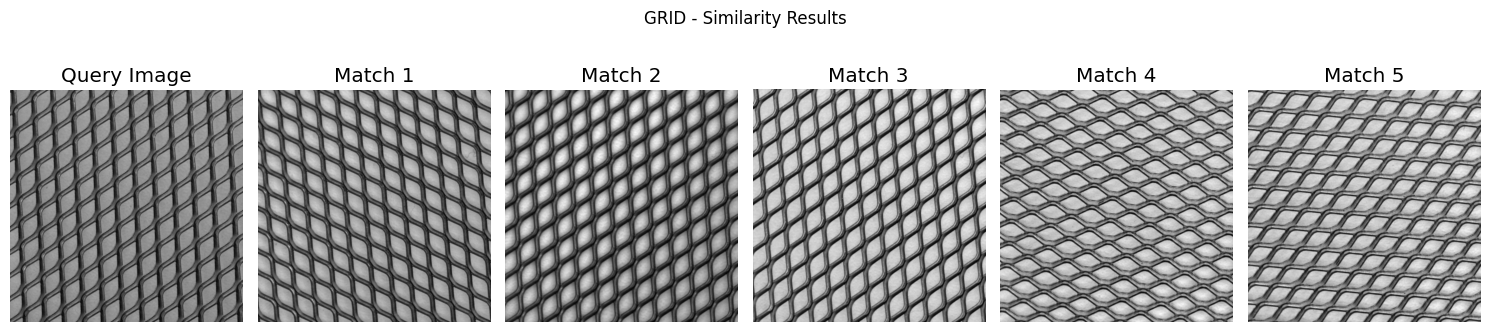


Processing TILE category
Extracting training features...
✅ Collected 230 training samples

Testing with 3 query images:

Visualizing results...


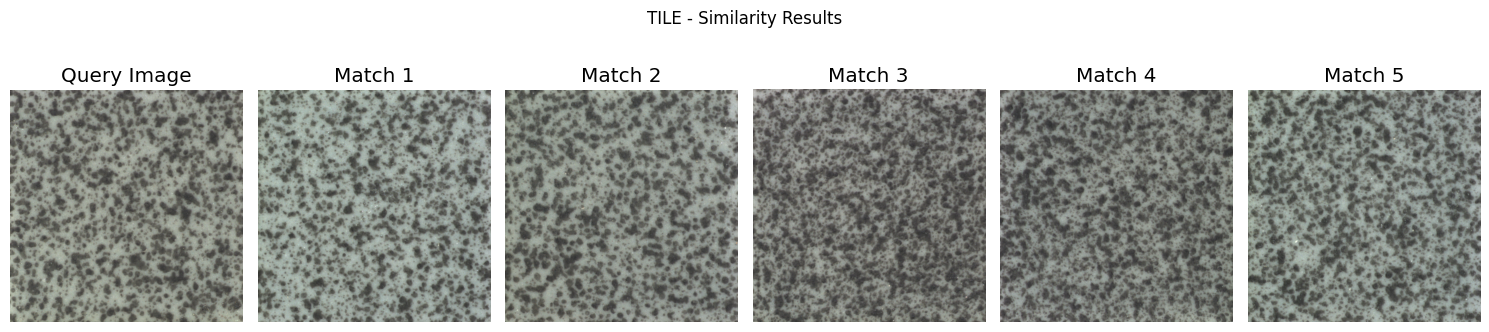

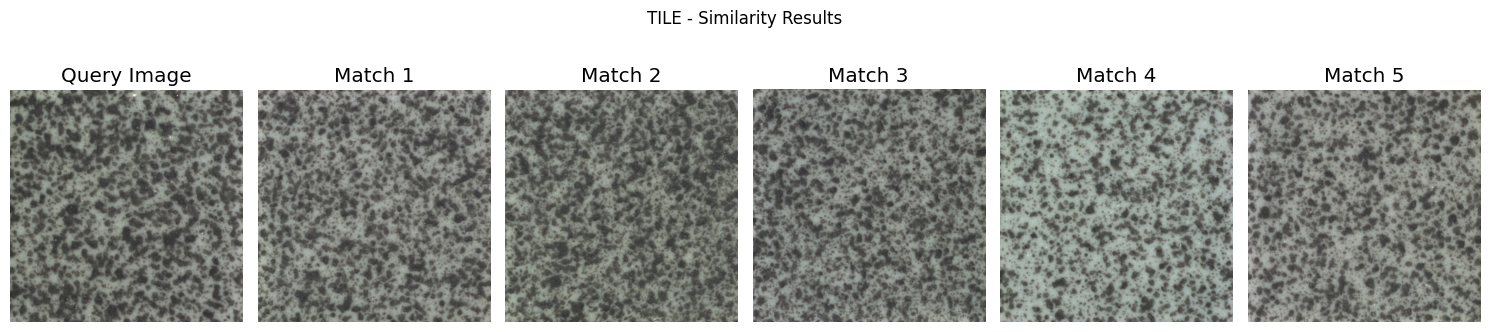

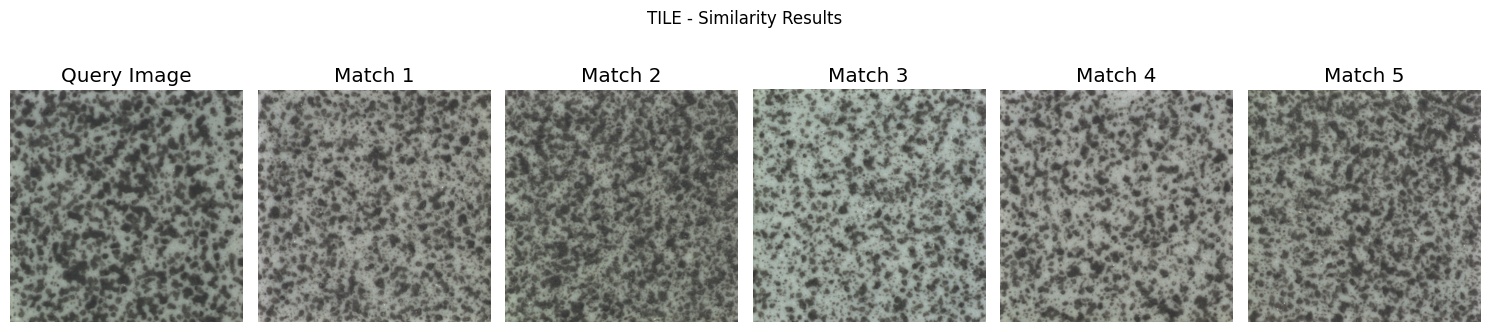

In [5]:
for category in categories:
    print(f"\n{'='*40}")
    print(f"Processing {category.upper()} category")
    print(f"{'='*40}")
    
    # Path setup
    train_path = os.path.join(dataset_dir, category, "train", "good")
    test_path = os.path.join(dataset_dir, category, "test", "good")
    
    # Validate paths
    if not all(os.path.exists(p) for p in [train_path, test_path]):
        print(f"⚠️ Missing paths for {category}, skipping...")
        continue
    
    # Feature extraction
    print("Extracting training features...")
    train_feats, train_imgs = get_features(train_path)
    print(f"✅ Collected {len(train_imgs)} training samples")
    
    # Random test selection
    test_images = [os.path.join(test_path, f) 
                  for f in os.listdir(test_path) if f.lower().endswith('.png')]
    selected_queries = random.sample(test_images, min(3, len(test_images)))
    print(f"\nTesting with {len(selected_queries)} query images:")
    
    # Find similarities
    results = find_similar_images(selected_queries, train_feats, train_imgs)
    
    # Visualization
    print("\nVisualizing results...")
    visualize_results(results, category)

## Layers Overview

**Layer 1:** Convolution with a 4×4 kernel, stride 1

**Layer 2:** Pooling (average or max) with a 2×2 kernel, stride 2

**Layer 3:** Convolution with a 3×3 kernel, stride 2

**Layer 4:** Convolution with a 4×4 kernel, stride 1

**Layer 5:** Convolution with a 3×3 kernel, stride 1

**Layer 6:** Pooling with a 2×2 kernel, stride 2

## Receptive Field After Each Layer

### Layer 0 (Input)
- **Receptive Field (RF):** 1

### Layer 1 (Convolution)
- **Kernel Size** (\( k_1 \)): 4  
- **Stride** (\( s_1 \)): 1  
- **Calculation:**  
  
  RF_1 = 1 + (k_1 - 1) * s_1 = 1 + (4 - 1) * 1 = 4
  

### Layer 2 (Pooling)
- **Kernel Size** (\( k_2 \)): 2  
- **Stride** (\( s_2 \)): 2  
- **Calculation:**  
  
  RF_2 = RF_1 + (k_2 - 1) * s_1 = 4 + (2 - 1) * 1 = 5
  
  
### Layer 3 (Convolution)
- **Kernel Size** (\( k_3 \)): 3  
- **Stride** (\( s_3 \)): 2  
- **Calculation:**  
  
  RF_3 = RF_2 + (k_3 - 1) * (s_1 * s_2) = 5 + (3 - 1) * 2 = 9
  

### Layer 4 (Convolution)
- **Kernel Size** (\( k_4 \)): 4  
- **Stride** (\( s_4 \)): 1  
- **Calculation:**  
  
  RF_4 = RF_3 + (k_4 - 1) * (s_1 * s_2 * s_3) = 9 + (4 - 1) * 4 = 21
  

### Layer 5 (Convolution)
- **Kernel Size** (\( k_5 \)): 3  
- **Stride** (\( s_5 \)): 1  
- **Calculation:**  
  
  RF_5 = RF_4 + (k_5 - 1) * (s_1 * s_2 * s_3 * s_4) = 21 + (3 - 1) * 4 = 29
  

### Layer 6 (Pooling)
- **Kernel Size** (\( k_6 \)): 2  
- **Stride** (\( s_6 \)): 2  
- **Calculation:**  
  
  RF_6 = RF_5 + (k_6 - 1) * (s_1 * s_2 * s_3 * s_4 * s_5) = 29 + (2 - 1) * 4 = 33
  